In [186]:
import os, sklearn, math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from joblib import dump, load

tf.random.set_seed(42)

data = '220424_Data'
dataname = data+'_1'
filename = 'myData/'+data+'.csv'
SD = pd.read_csv(filename)
SD=SD.iloc[:,:11]
SensorData = SD

In [187]:
SD.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,r,theta,z
count,99918.000000,99918.000000,99918.000000,99918.000000,99918.000000,99918.000000,99918.000000,99918.000000,99918.000000,99918.000000
mean,36.885424,50.419315,47.560456,51.610067,35.218341,59.430599,54.758089,1.100073,349.283085,52.002442
std,1.673678,4.202677,4.305497,3.993194,14.080041,6.579231,4.770671,0.418341,33.692575,24.819957
min,29.320000,32.120000,30.580000,35.990000,-26.480000,34.770000,35.870000,0.400000,0.000000,10.000000
25%,36.110000,47.620000,45.080000,49.340000,25.050000,54.430000,51.770000,0.750000,351.390000,30.000000
50%,36.950000,50.940000,48.190000,52.210000,36.940000,60.040000,56.010000,1.100000,352.570000,52.000000
75%,37.800000,53.150000,50.260000,54.110000,46.850000,64.260000,58.130000,1.450000,353.500000,74.000000
max,46.280000,65.330000,59.590000,63.650000,64.690000,76.890000,64.490000,1.800000,359.960000,94.000000


In [188]:
SDext =SD # SensorData[SensorData['z']==0]
mask = SDext["z"].isin(list(range(10,86,2)))
maskr = SDext["r"].isin([0.4,0.45,0.5,0.55])
maskr = ~maskr
SD = SDext[mask & maskr]
SD.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,r,theta,z
count,76123.000000,76123.000000,76123.000000,76123.000000,76123.000000,76123.000000,76123.000000,76123.000000,76123.000000,76123.000000
mean,36.935643,49.932794,46.586036,50.861906,35.383599,58.860388,55.611611,1.200016,348.556076,46.999724
std,1.741517,4.242596,4.248805,4.117674,13.605701,7.023008,3.857633,0.360585,38.559364,21.931559
min,29.320000,32.120000,30.580000,35.990000,-26.480000,34.770000,39.050000,0.600000,0.000000,10.000000
25%,36.110000,47.620000,44.050000,48.390000,25.050000,53.020000,53.890000,0.900000,351.650000,28.000000
50%,36.950000,49.830000,47.150000,51.250000,36.940000,60.040000,56.010000,1.200000,352.840000,48.000000
75%,37.800000,53.150000,50.260000,54.110000,45.860000,64.260000,58.130000,1.500000,353.670000,66.000000
max,46.280000,63.110000,58.550000,63.650000,64.690000,76.890000,64.490000,1.800000,359.960000,84.000000


In [189]:
import numpy as np
SD['r'] = (SD['r']-SD['r'].mean())/(SD['r'].max()-SD['r'].min())*2
SD['z'] = (SD['z']-SD['z'].mean())/(SD['z'].max()-SD['z'].min())*2
SD.describe()

C:\Users\JH_LAB\AppData\Local\Temp/ipykernel_644/1877745495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD['r'] = (SD['r']-SD['r'].mean())/(SD['r'].max()-SD['r'].min())*2
C:\Users\JH_LAB\AppData\Local\Temp/ipykernel_644/1877745495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD['z'] = (SD['z']-SD['z'].mean())/(SD['z'].max()-SD['z'].min())*2


,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,r,theta,z
count,76123.000000,76123.000000,76123.000000,76123.000000,76123.000000,76123.000000,76123.000000,7.612300e+04,76123.000000,7.612300e+04
mean,36.935643,49.932794,46.586036,50.861906,35.383599,58.860388,55.611611,-3.143006e-15,348.556076,-4.367490e-14
std,1.741517,4.242596,4.248805,4.117674,13.605701,7.023008,3.857633,6.009744e-01,38.559364,5.927448e-01
min,29.320000,32.120000,30.580000,35.990000,-26.480000,34.770000,39.050000,-1.000026e+00,0.000000,-9.999925e-01
25%,36.110000,47.620000,44.050000,48.390000,25.050000,53.020000,53.890000,-5.000263e-01,351.650000,-5.135061e-01
50%,36.950000,49.830000,47.150000,51.250000,36.940000,60.040000,56.010000,-2.627327e-05,352.840000,2.703448e-02
75%,37.800000,53.150000,50.260000,54.110000,45.860000,64.260000,58.130000,4.999737e-01,353.670000,5.135210e-01
max,46.280000,63.110000,58.550000,63.650000,64.690000,76.890000,64.490000,9.999737e-01,359.960000,1.000007e+00


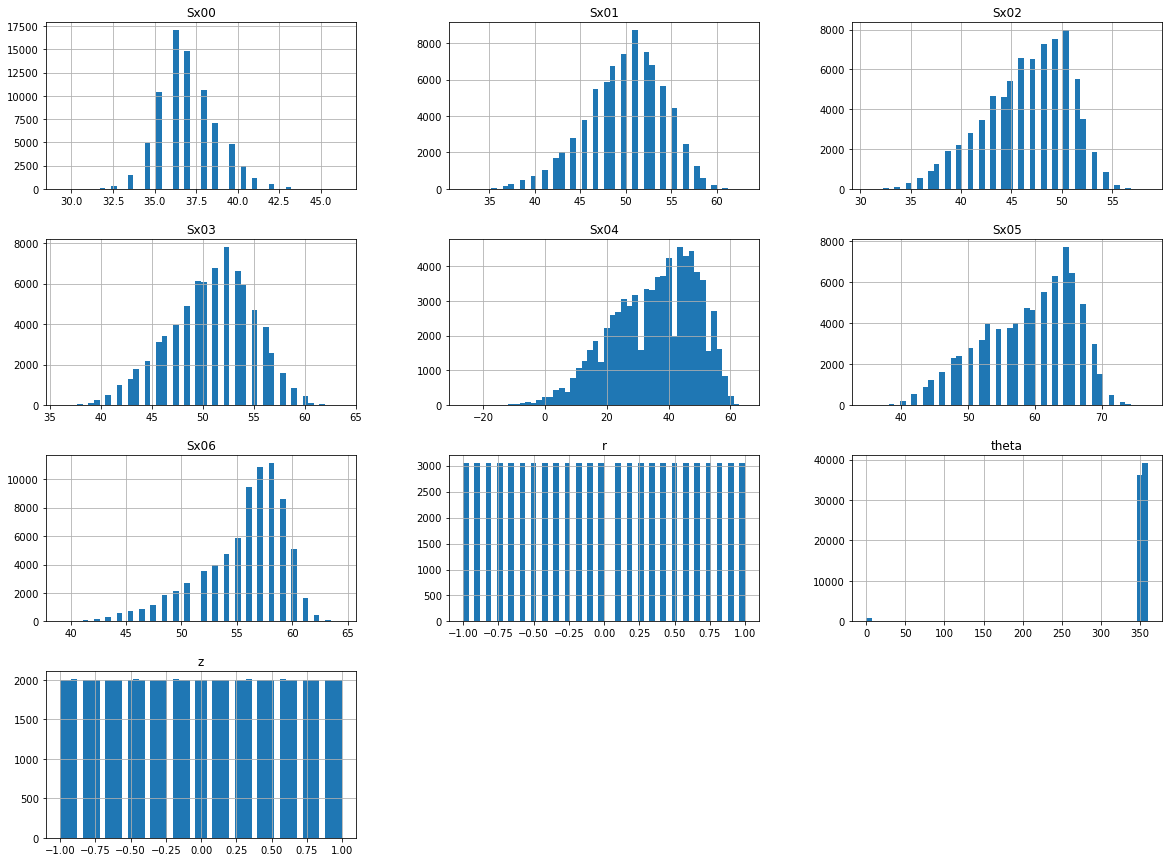

In [190]:
%matplotlib inline
import matplotlib.pyplot as plt
SD.hist(bins=50, figsize=(20,15))
plt.show()

In [191]:
X = SD.iloc[:,[1,2,3,4,5,6]]
y = SD.iloc[:,[7,9]]

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.01, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2, random_state=42)

In [193]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  60288 ea 79 %    X_valid:  15073 ea 19 %    X_test:  762 ea 1 %


In [194]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [195]:
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_SS.pkl'
dump(scaler, file_name)

['myScaler/220424_Data_1_SS.pkl']

In [235]:
 from tensorflow import keras
model = keras.models.Sequential([    
    keras.layers.Dense(16, activation="elu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.Dense(16, activation="elu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.Dense(8, activation="elu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.Dense(8, activation="elu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.Dense(2)
])
#model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3, momentum = 0.9,nesterov = True))
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3, rho = 0.9))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 16)                112       
                                                                 
 dense_87 (Dense)            (None, 16)                272       
                                                                 
 dense_88 (Dense)            (None, 8)                 136       
                                                                 
 dense_89 (Dense)            (None, 8)                 72        
                                                                 
 dense_90 (Dense)            (None, 2)                 18        
                                                                 
Total params: 610
Trainable params: 610
Non-trainable params: 0
_________________________________________________________________


In [236]:
import os 
root_logdir = os.path.join(os.curdir, 'mylog/'+data)

def get_run_logdir():
    import time
    run_id= time.strftime("%m%d_%Hh%Mm%Ss"+dataname)
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [237]:
K = keras.backend
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [238]:
dataname

'220424_Data_1'

In [239]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
n_epochs = 300
batch_size = 1
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle,early_stopping_cb,tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

Epoch 1/300
1884/1884 [==============================] - 2s 805us/step - loss: 0.0840 - val_loss: 0.0759
Epoch 2/300
1884/1884 [==============================] - 1s 762us/step - loss: 0.0729 - val_loss: 0.0759
Epoch 3/300
1884/1884 [==============================] - 1s 785us/step - loss: 0.0712 - val_loss: 0.0695
Epoch 4/300
1884/1884 [==============================] - 1s 788us/step - loss: 0.0706 - val_loss: 0.0690
Epoch 5/300
1884/1884 [==============================] - 1s 765us/step - loss: 0.0703 - val_loss: 0.0701
Epoch 6/300
1884/1884 [==============================] - 1s 750us/step - loss: 0.0698 - val_loss: 0.0726
Epoch 7/300
1884/1884 [==============================] - 1s 734us/step - loss: 0.0697 - val_loss: 0.0692
Epoch 8/300
1884/1884 [==============================] - 1s 731us/step - loss: 0.0696 - val_loss: 0.0679
Epoch 9/300
1884/1884 [==============================] - 1s 726us/step - loss: 0.0694 - val_loss: 0.0677
Epoch 10/300
1884/1884 [==============================]

In [240]:
%load_ext tensorboard
%tensorboard --logdir=./mylog/220424_Data --port=424

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 424 (pid 19864), started 0:41:49 ago. (Use '!kill 19864' to kill it.)

In [241]:
model.save('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v4/myModel/'+dataname+'.h5')

In [242]:
model = tf.keras.models.load_model('myModel/'+dataname+'.h5')
scaler = load(file_name)
valid_predictions = model.predict(X_valid)

In [243]:
valid_predictions_df=pd.DataFrame(valid_predictions)
valid_predictions_df.columns = ["valid_r","valid_z"]
#valid_predictions_df.columns = ["valid_r"]
valid_predictions_df

,valid_r,valid_z
0,-0.421281,-0.312144
1,-0.143743,0.571842
2,-0.628518,-0.045094
3,-0.089991,-0.980510
4,-0.523247,-0.031711
...,...,...
15068,0.119132,0.617105
15069,-0.923298,0.746244
15070,-0.331435,-0.820718
15071,-0.682324,0.248287


In [244]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
k_df.columns  = ["r","z"]
#k_df.columns  = ["r"]
k_df

,r,z
0,-0.750026,-0.189182
1,-0.416693,0.621629
2,-0.416693,0.081089
3,-0.833360,-0.999993
4,-0.500026,-0.027020
...,...,...
15068,0.083307,0.675683
15069,-1.000026,0.783791
15070,-0.166693,-0.729722
15071,-0.833360,0.135143


In [245]:
k_df.describe()

,r,z
count,15073.000000,15073.000000
mean,0.002561,0.008591
std,0.602393,0.592021
min,-1.000026,-0.999993
25%,-0.500026,-0.513506
50%,-0.000026,0.027034
75%,0.499974,0.513521
max,0.999974,1.000007


In [246]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
for i in range(0,2):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr

corr
81.94% r
97.85% z


,r,z,valid_r,valid_z
r,1.000000,-0.005210,0.819352,0.003715
z,-0.005210,1.000000,0.005274,0.978472
valid_r,0.819352,0.005274,1.000000,-0.029073
valid_z,0.003715,0.978472,-0.029073,1.000000


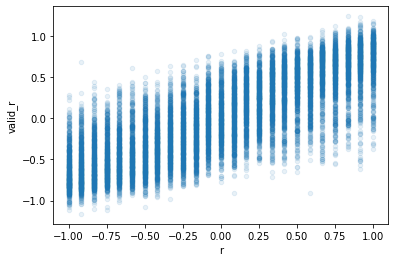

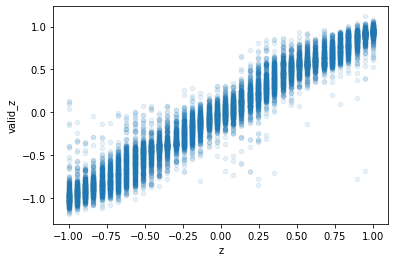

In [250]:
alpa=0.1
ValidPre.plot(kind="scatter", x= "r",y= "valid_r",alpha = alpa)
plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v4/myFig/'+dataname+'_r.png')
ValidPre.plot(kind="scatter", x= "z",y= "valid_z",alpha = alpa)
plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v4/myFig/'+dataname+'_z.png')